**Name:** @itscroknight



---



**Practicle 2:** Data Wrangling II
Create an “Academic performance” dataset of students and perform the following
operations using Python.


1.   Scan all variables for missing values and inconsistencies. If there are missing
values and/or inconsistencies, use any of the suitable techniques to deal with
them.
2.   Scan all numeric variables for outliers. If there are outliers, use any of the
suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for
better understanding of the variable, to convert a non-linear relation into a
linear one, or to decrease the skewness and convert the distribution into a
normal distribution










In [ ]:
import pandas as pd


Imported the pandas library.

In [ ]:
df = pd.DataFrame({'Roll_No': [27, 28, 26, 32, 12, 11, 14, 23, 45, 8], 'Name':['Krishna', 'Harshad', 'Karan', 'Jack', 'John', 'Rick','Lauren', 'Harsh', 'Mayur', 'Richard'], 'Math_Marks':[105,69,25,69,62,65,75,45,36,153], 'English_Marks':[97,56,200,25,45,78,93,69,56,58]}, index=[1,3,5,6,7,8,10,11,12,14])
df = df.reindex({1,2,3,4,5,6,7,8,9,10,11,12,13,14,15})

Created a dataframe and created a database of students in the dataframe with attributes 'Roll-No', 'Name', 'Math_score' and 'English_score'.

In [ ]:
df.isnull()

,Roll_No,Name,Math_Marks,English_Marks
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,True,True,True,True
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,True,True,True,True
10,False,False,False,False


In [ ]:
df.isnull().any()

Roll_No          True
Name             True
Math_Marks       True
English_Marks    True
dtype: bool

Checked for null values in the dataset.

In [ ]:
df

,Roll_No,Name,Math_Marks,English_Marks
1,27.0,Krishna,105.0,97.0
2,NaN,NaN,NaN,NaN
3,28.0,Harshad,69.0,56.0
4,NaN,NaN,NaN,NaN
5,26.0,Karan,25.0,200.0
6,32.0,Jack,69.0,25.0
7,12.0,John,62.0,45.0
8,11.0,Rick,65.0,78.0
9,NaN,NaN,NaN,NaN
10,14.0,Lauren,75.0,93.0


In [ ]:
df.dropna(axis=0, inplace=True)

Dropped the rows containg the null values.

In [ ]:
df

,Roll_No,Name,Math_Marks,English_Marks
1,27.0,Krishna,105.0,97.0
3,28.0,Harshad,69.0,56.0
5,26.0,Karan,25.0,200.0
6,32.0,Jack,69.0,25.0
7,12.0,John,62.0,45.0
8,11.0,Rick,65.0,78.0
10,14.0,Lauren,75.0,93.0
11,23.0,Harsh,45.0,69.0
12,45.0,Mayur,36.0,56.0
14,8.0,Richard,153.0,58.0


In [ ]:
df.describe()

,Roll_No,Math_Marks,English_Marks
count,10.000000,10.000000,10.000000
mean,22.600000,70.400000,77.700000
std,11.471704,36.567138,48.092619
min,8.000000,25.000000,25.000000
25%,12.500000,49.250000,56.000000
50%,24.500000,67.000000,63.500000
75%,27.750000,73.500000,89.250000
max,45.000000,153.000000,200.000000


Used describe() to get basic statistics about the data.

In [ ]:
import numpy as np
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Roll_No          15.25
Math_Marks       24.25
English_Marks    33.25
dtype: float64


<ipython-input-9-110bb78f3fc7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-9-110bb78f3fc7>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


Imported numpy library and setting quartile 1 and quartile 3 as Q1 and Q3 respectively. Also, InterQuartile Range(IQR) which is Q3-Q1.

<Axes: >

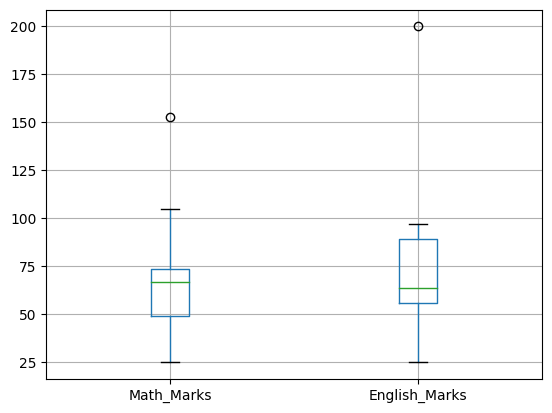

In [ ]:
numeric_col = ['Math_Marks', 'English_Marks']
categorial_col = ['Roll_no', 'Name']
df.boxplot(numeric_col)

Seperated the numeric and categorial data and boxplotting for the outliers in the data. We got 2 outliers 1 in Math_marks and 1 in English_marks

In [ ]:
df_out=df[numeric_col][~((df[numeric_col]<(Q1-1.5*IQR))| (df[numeric_col]>(Q3+1.5*IQR)))]
print(df_out.ffill())

    Math_Marks  English_Marks
1        105.0           97.0
3         69.0           56.0
5         25.0           56.0
6         69.0           25.0
7         62.0           45.0
8         65.0           78.0
10        75.0           93.0
11        45.0           69.0
12        36.0           56.0
14        36.0           58.0


<ipython-input-19-2dddc5742e69>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out=df[numeric_col][~((df[numeric_col]<(Q1-1.5*IQR))| (df[numeric_col]>(Q3+1.5*IQR)))]
<ipython-input-19-2dddc5742e69>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out=df[numeric_col][~((df[numeric_col]<(Q1-1.5*IQR))| (df[numeric_col]>(Q3+1.5*IQR)))]


Used IQR method for trating the Outliers and then used forward fill for the null values.